# Supervised Learning

## Linear Regression

Slope (m): 4.500000000000001
Intercept (c): 47.099999999999994
R-squared: 0.9965551181102362


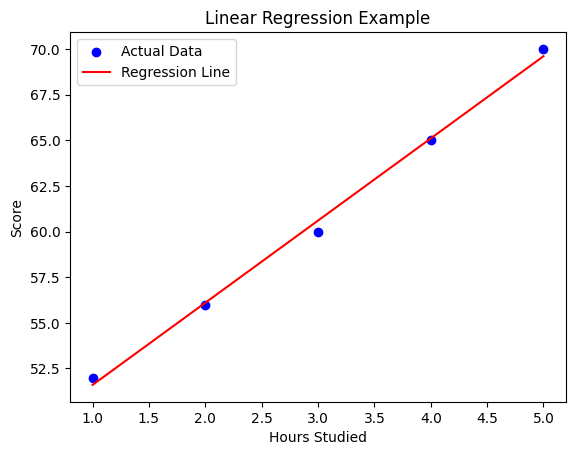

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data
data = {
    'Hours Studied': [1, 2, 3, 4, 5],
    'Score': [52, 56, 60, 65, 70]
}
df = pd.DataFrame(data)

# Features and Target
X = df[['Hours Studied']]
y = df['Score']

# Model
model = LinearRegression()
model.fit(X, y)

# Predictions
predictions = model.predict(X)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

# R-squared
r_squared = r2_score(y, predictions)

# Results
print(f"Slope (m): {slope}")
print(f"Intercept (c): {intercept}")
print(f"R-squared: {r_squared}")

# Plot
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

### Multiple Linear Regression

In [4]:
# Extended Data
data = {
    'Size': [1500, 1600, 1700, 1800, 1900],
    'Bedrooms': [3, 3, 4, 4, 5],
    'Price': [300000, 320000, 340000, 360000, 380000]
}
df = pd.DataFrame(data)

# Features and Target
X = df[['Size', 'Bedrooms']]
y = df['Price']

# Model
model = LinearRegression()
model.fit(X, y)

# Coefficients
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [2.00000000e+02 7.66909031e-12]
Intercept: 5.820766091346741e-11


In [6]:
# Predictions
predictions = model.predict(X)

In [7]:
# R-squared
r_squared = r2_score(y, predictions)

# Results
print(f"Slope (m): {slope}")
print(f"Intercept (c): {intercept}")
print(f"R-squared: {r_squared}")

Slope (m): 4.500000000000001
Intercept (c): 5.820766091346741e-11
R-squared: 1.0


## Logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import make_classification

# Create synthetic data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model with high regularization (High Bias)
high_bias_model = LogisticRegression(C=0.01)
high_bias_model.fit(X_train, y_train)
high_bias_pred = high_bias_model.predict(X_test)

# Model with low regularization (High Variance)
low_bias_model = LogisticRegression(C=100)
low_bias_model.fit(X_train, y_train)
low_bias_pred = low_bias_model.predict(X_test)

# Compare accuracy
print("High Bias Model Accuracy:", accuracy_score(y_test, high_bias_pred))
print("Low Bias Model Accuracy:", accuracy_score(y_test, low_bias_pred))

High Bias Model Accuracy: 0.8533333333333334
Low Bias Model Accuracy: 0.84


### ROC Curve and AUC

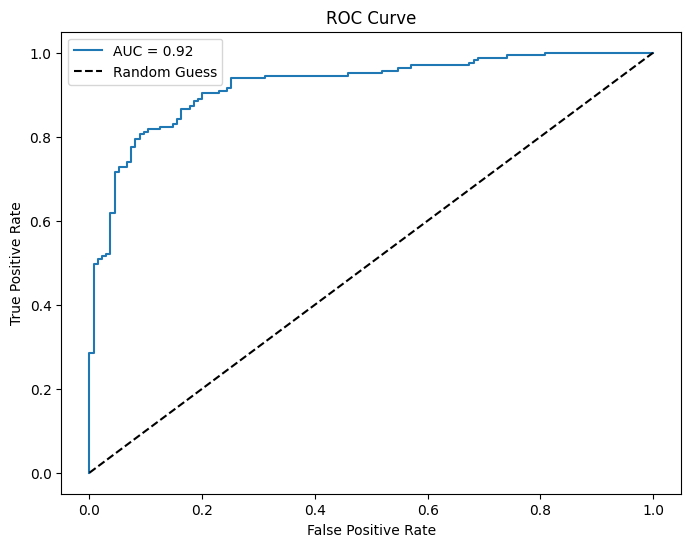

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
probs = low_bias_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Regularization

In [10]:
from sklearn.linear_model import LogisticRegression

# L1 Regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)

# L2 Regularization
ridge_model = LogisticRegression(penalty='l2')
ridge_model.fit(X_train, y_train)

print("L1 Regularization Coefficients:", lasso_model.coef_)
print("L2 Regularization Coefficients:", ridge_model.coef_)

L1 Regularization Coefficients: [[ 0.          0.09970272  0.          0.06964206 -0.05684009 -0.27154637
   2.21017554  0.         -0.29155481  0.04095966]]
L2 Regularization Coefficients: [[-0.45063402  0.11231116 -0.74156534  0.08276314 -0.06901049 -0.28295706
   1.61185747 -0.00769261 -0.62367657  0.05969979]]


## Naïve Bayes Classifier

### Gaussian Naïve Bayes

**Scenario:** Predicting whether a person buys a product based on their age and income.

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Dataset
X = np.array([[25, 50000], [35, 65000], [45, 80000], [20, 20000], [50, 90000]])
y = np.array([1, 1, 1, 0, 1])  # 1: Buys, 0: Does not buy

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 1.0


### Multinomial Naïve Bayes

**Scenario:** Classifying text documents.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample Data
texts = ["free money", "free lottery", "work meeting", "team discussion"]
labels = [1, 1, 0, 0]  # 1: Spam, 0: Not Spam

# Convert Text to Features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Model
model = MultinomialNB()
model.fit(X, labels)

# Test
test_texts = ["free offer", "team meeting"]
test_X = vectorizer.transform(test_texts)
print("Predictions:", model.predict(test_X))

Predictions: [1 0]


### Advanced Use Case: Sentiment Analysis

**Scenario:** Classifying movie reviews as positive or negative.

In [11]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

# Dataset
categories = ['rec.sport.hockey', 'sci.space']
data = fetch_20newsgroups(subset='train', categories=categories)

# Pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Train
pipeline.fit(data.data, data.target)

# Test
test_data = ['The movie is too bad', 'The spacecraft launched successfully']
print("Predictions:", pipeline.predict(test_data))

Predictions: [0 1]


## K - Nearest Neighbour

### Basic Implementation:

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize K-NN classifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


### Cross-Validation for Optimal k:

In [5]:
from sklearn.model_selection import cross_val_score

k_values = range(1, 31)
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

optimal_k = k_values[k_scores.index(max(k_scores))]
print(f"Optimal k: {optimal_k}")

Optimal k: 3


### Visualization:

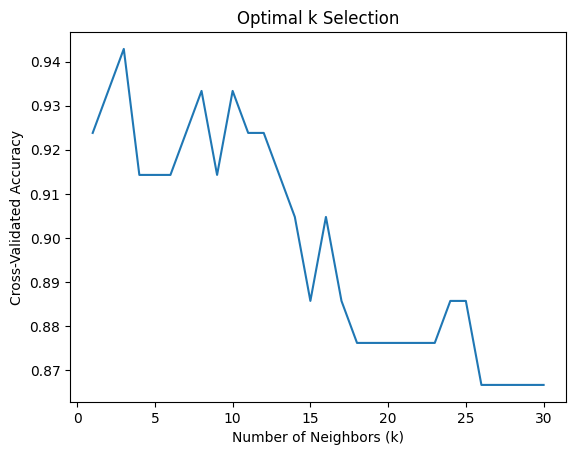

In [6]:
import matplotlib.pyplot as plt

plt.plot(k_values, k_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal k Selection')
plt.show()

### Custom Distance Metric Implementation:

In [8]:
from scipy.spatial.distance import minkowski

class CustomKNN:
    def __init__(self, k=3, p=2):
        self.k = k
        self.p = p

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [minkowski(x, x_train, self.p) for x_train in self.X_train]
            k_indices = sorted(range(len(distances)), key=lambda i: distances[i])[:self.k]
            k_labels = [self.y_train[i] for i in k_indices]
            predictions.append(max(set(k_labels), key=k_labels.count))
        return predictions

# Example Usage
knn_custom = CustomKNN(k=5, p=2)
knn_custom.fit(X_train, y_train)
y_pred_custom = knn_custom.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_custom)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## Decision tree

#### CART Implementation

We will use the famous Iris dataset for classification.

In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Display the tree structure
print(export_text(clf, feature_names=iris.feature_names))

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2

Accuracy: 1.00


#### C5.0 Implementation

Using the sklearn Library for Approximation

C5.0 is not directly available in Python’s standard libraries. However, we can approximate its behavior using entropy-based splits.

In [19]:
# Create and train the model with 'entropy'
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf_entropy.fit(X_train, y_train)

# Display the tree structure
print(export_text(clf_entropy, feature_names=iris.feature_names))

# Evaluate the model
accuracy_entropy = clf_entropy.score(X_test, y_test)
print(f"Accuracy (Entropy): {accuracy_entropy:.2f}")

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2

Accuracy (Entropy): 1.00


#### Visualizing Decision Trees

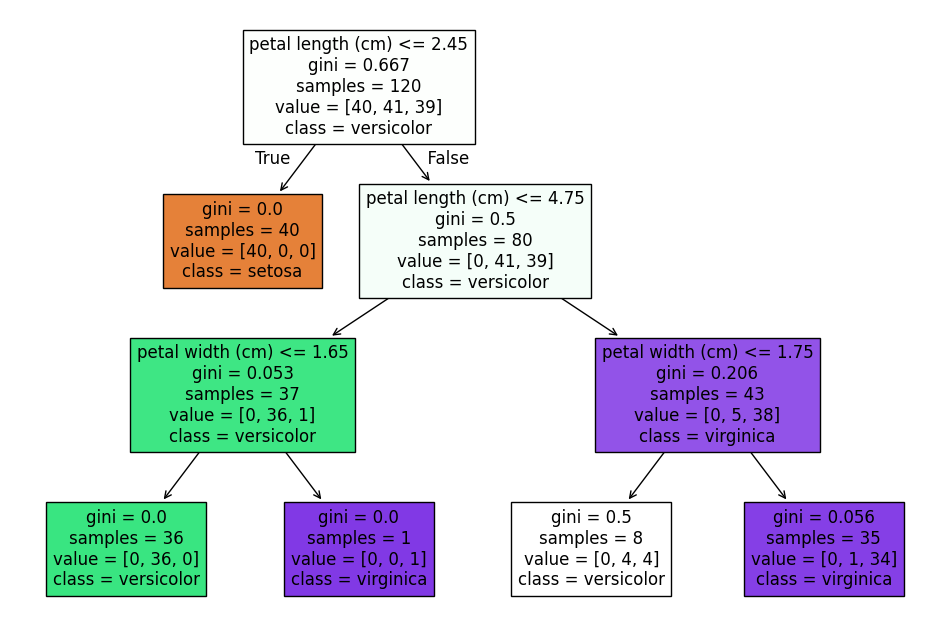

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

## Random Forest

#### Basic Example

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and accuracy
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 1.0


#### Advanced Example with Hyperparameter Tuning

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load dataset
data_1 = load_breast_cancer()
X = data_1.data
y = data_1.target

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


#### Feature Importances

Random Forest ranks features by their importance in making predictions.

In [2]:
import pandas as pd

# Feature importance
importances = model.feature_importances_
feature_names = data.feature_names

# Create DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False))

             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


#### Handling Imbalanced Data

Use class weighting or sampling techniques to balance classes.

#### Random Forest for Regression

Instead of classification, Random Forest can predict continuous values.

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Regression example
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)
print("MSE:", mean_squared_error(y_test, predictions))

MSE: 0.0013833333333333336


#### Visualization Techniques

Decision Tree Plots

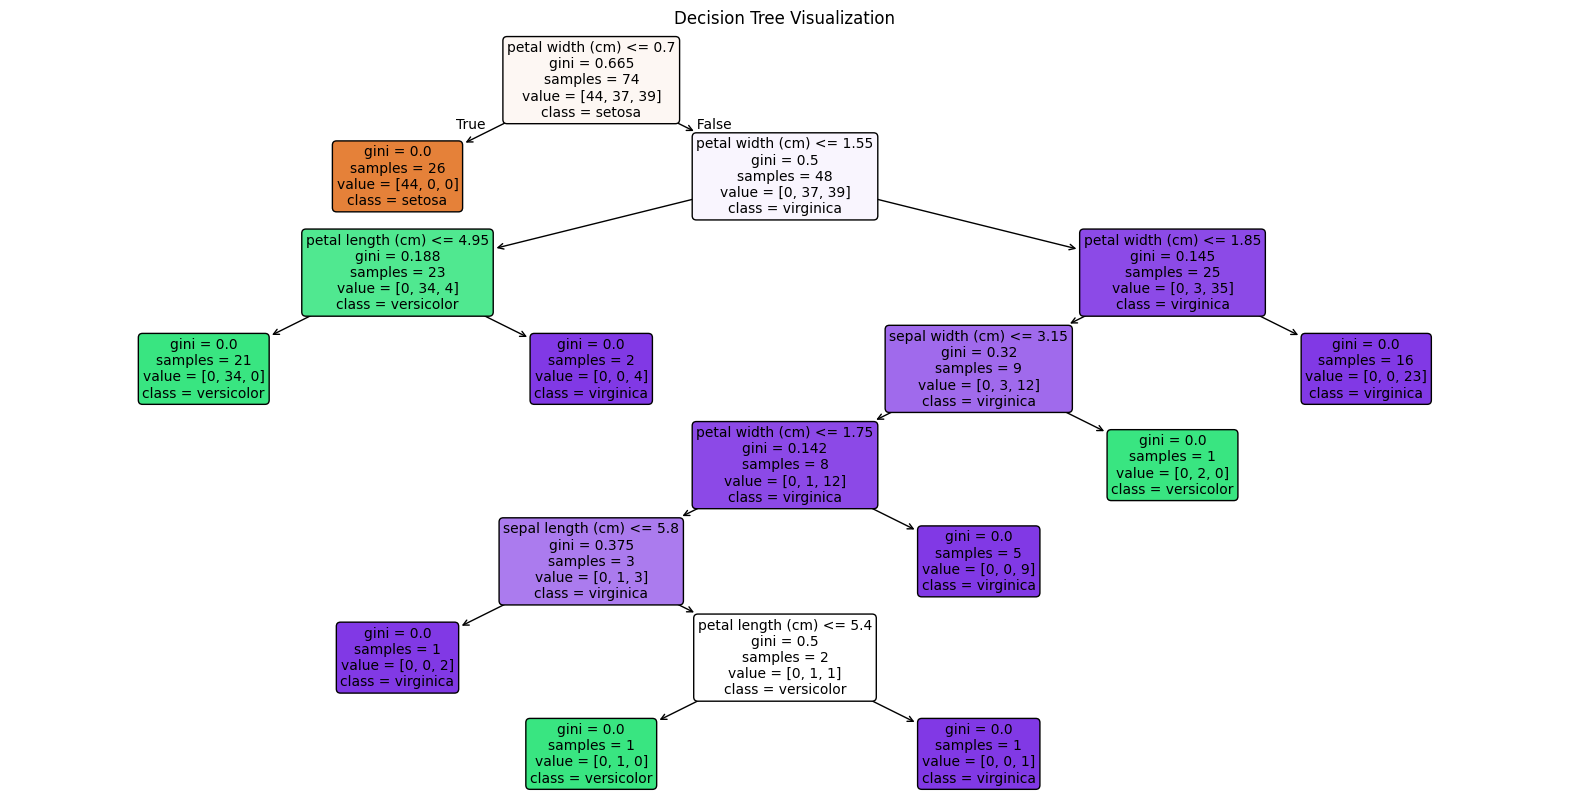

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize a single tree from the Random Forest
estimator = model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(estimator, 
          feature_names=data.feature_names, 
          class_names=data.target_names, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

Feature Importance Visualization

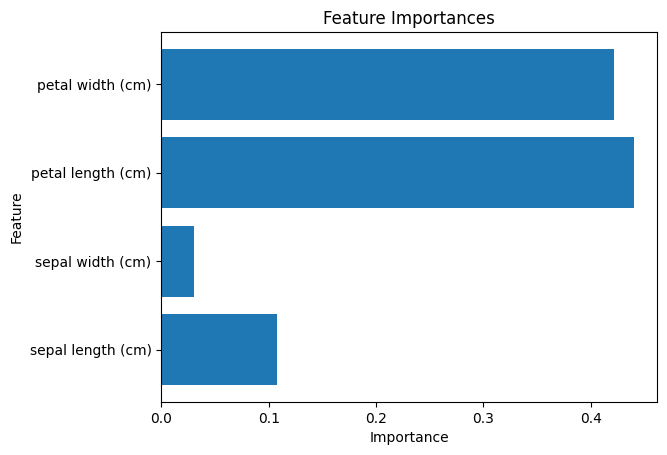

In [7]:
import matplotlib.pyplot as plt

plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()

## Support Vector Machines 

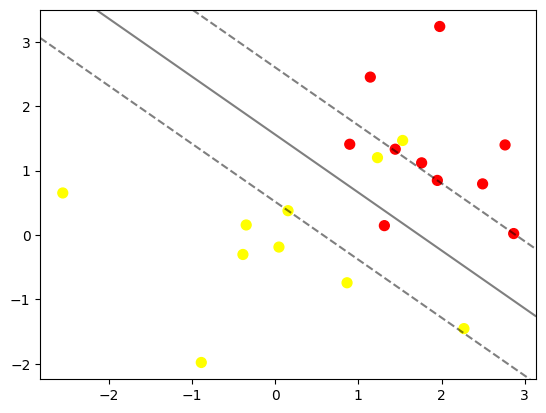

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate sample data
np.random.seed(0)
X = np.random.randn(20, 2)
y = np.array([0]*10 + [1]*10)
X[:10] += 1  # Shift one class

# Train an SVM model
model = SVC(kernel='linear')
model.fit(X, y)

# Plot the data and decision boundary
def plot_svm(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    plt.show()

plot_svm(model, X, y)

#### Implementation with Kernels

Accuracy: 1.0


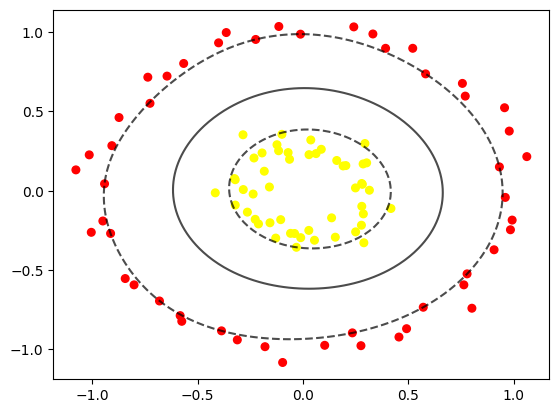

In [6]:
# Import necessary libraries
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create a non-linearly separable dataset
X, y = make_circles(n_samples=100, factor=.3, noise=.05, random_state=42)

# Train SVM with RBF kernel
rbf_model = SVC(kernel='rbf', C=1, gamma='scale')
rbf_model.fit(X, y)

# Predict and evaluate
predictions = rbf_model.predict(X)
print("Accuracy:", accuracy_score(y, predictions))

# Visualize decision boundary
def plot_decision_boundary(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='autumn')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create mesh grid
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               alpha=0.7, linestyles=['--', '-', '--'])
    plt.show()

plot_decision_boundary(rbf_model, X, y)

## Time Series Analysis (TSA)

#### Example of AR

### ACF and PACF

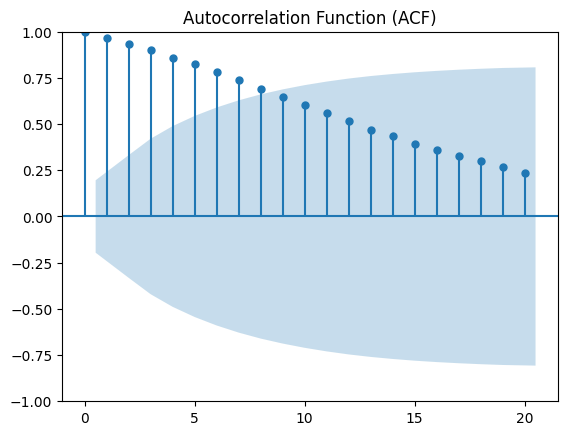

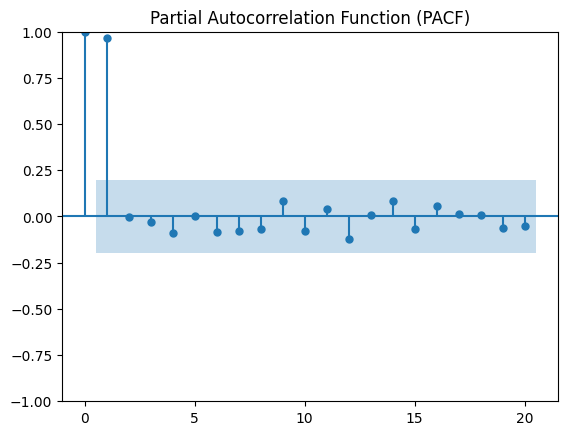

In [2]:
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate synthetic data
np.random.seed(42)
data = np.cumsum(np.random.randn(100))

# ACF and PACF plots
plot_acf(data, lags=20, title="Autocorrelation Function (ACF)")
plt.show()

plot_pacf(data, lags=20, title="Partial Autocorrelation Function (PACF)")
plt.show()

#### Key Observations in the ACF Graph:
**High Initial Values:**

The correlation starts at 1 at lag 0 (as a time series is perfectly correlated with itself).
For the first few lags (1, 2, etc.), the correlation is significant, indicating the presence of autocorrelation at these lags.

**Gradual Decay:**

The ACF values decrease gradually as the lag increases.
This suggests that the time series has a strong dependence on past values, which is typical in an AR (Autoregressive) process.

**Confidence Interval:**

The blue shaded region represents the confidence intervals (default is 95% confidence level).
Any lag outside this region indicates significant autocorrelation.
Here, significant autocorrelation is observed up to several lags.

#### Key observations of the PACF Plot:
**Sharp Drop-Off After Lag 2:**

The PACF plot shows significant spikes at lags 1 and 2, but the values drop to near zero for lags beyond 2.
This indicates that the time series has a dependence on the last two observations (lags 1 and 2) but not on observations further back in time.

**Key Suggestion for Model Order:**

The sharp cutoff at lag 2 suggests that the time series likely follows an AR(2) process.
In an AR process, the PACF provides a clear indication of the order (𝑝) of the autoregressive component. Here, 𝑝=2.

**Lack of MA Component:**

Since PACF only shows significant correlations at early lags (and cuts off beyond lag 2), this plot does not suggest any moving average (MA) component.


#### Interpretation of ACF and PACF Together
**ACF Interpretation (Uploaded Earlier):**

The ACF plot showed a gradual decay, indicating the presence of autocorrelation over multiple lags.
This is characteristic of an AR process or a mixed ARMA/ARIMA process.

**PACF Interpretation (Current Image):**

The PACF plot cuts off sharply after lag 2 (first two lags are significant, others fall within the confidence interval).
This suggests that the time series has an AR component of order 2 (𝑝=2).

#### Combined Interpretation for Model Selection:
**From ACF:**

Gradual decay indicates a potential AR process.
No sharp cutoff in ACF suggests no dominant MA component.

**From PACF:**

Sharp cutoff after lag 2 indicates an AR(2) model.
PACF doesn’t show characteristics of an MA process (exponential decay).

#### Conclusion:
The data can likely be modeled as an AR(2) process. If differencing is needed for stationarity, an ARIMA(p=2, d, q=0) model might be suitable. The degree of differencing (𝑑) depends on stationarity tests (like ADF).



### Understanding Stationarity

In [10]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
result = adfuller(data)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: -1.3583317659818985
p-value: 0.6020814791099101
The series is not stationary.


### Autoregressive (AR) Model

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(2)   Log Likelihood                -128.947
Method:               Conditional MLE   S.D. of innovations              0.902
Date:                Sat, 18 Jan 2025   AIC                            265.894
Time:                        10:42:31   BIC                            276.234
Sample:                             2   HQIC                           270.076
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2856      0.157     -1.822      0.068      -0.593       0.022
y.L1           0.9595      0.101      9.498      0.000       0.762       1.158
y.L2           0.0133      0.100      0.133      0.8

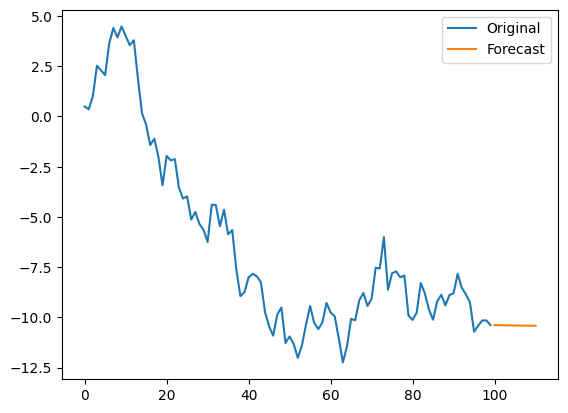

In [1]:
# Fit AR model
model = AutoReg(data, lags=2)   #ARIMA(data_diff, order=(2, 0, 0))
model_fit = model.fit()
print(model_fit.summary())

# Predict
predictions = model_fit.predict(start=len(data), end=len(data)+10)
plt.plot(np.arange(len(data)), data, label='Original')
plt.plot(np.arange(len(data), len(data)+11), predictions, label='Forecast')
plt.legend()
plt.show()

### Moving Average (MA) Model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -209.756
Date:                Sat, 18 Jan 2025   AIC                            427.512
Time:                        11:07:16   BIC                            437.933
Sample:                             0   HQIC                           431.730
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3533      0.672     -9.456      0.000      -7.670      -5.036
ma.L1          0.9522      0.075     12.613      0.000       0.804       1.100
ma.L2          0.8508      0.089      9.573      0.0

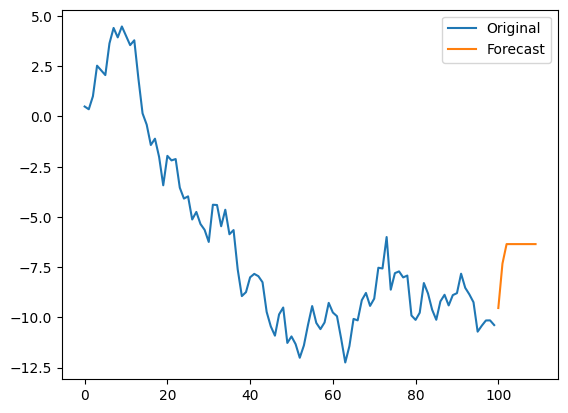

In [2]:
from statsmodels.tsa.arima.model import ARIMA

# Fit MA model
model = ARIMA(data, order=(0, 0, 2))
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=10)
plt.plot(np.arange(len(data)), data, label='Original')
plt.plot(np.arange(len(data), len(data)+10), forecast, label='Forecast')
plt.legend()
plt.show()

#### Example for MA

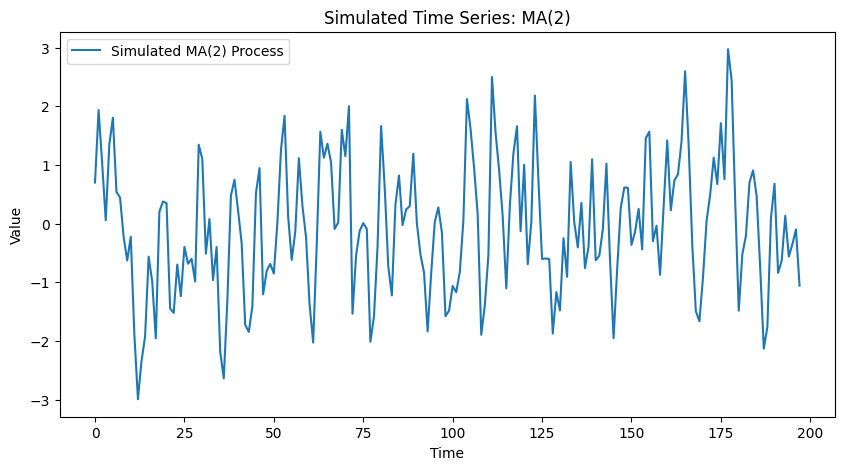

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Simulate an MA(2) process
np.random.seed(42)
n = 200  # Number of observations
noise = np.random.normal(loc=0, scale=1, size=n)  # White noise
theta1, theta2 = 0.7, 0.3  # MA coefficients
data = noise[2:] + theta1 * noise[1:-1] + theta2 * noise[:-2]  # MA(2) process

# Plot the generated MA(2) data
plt.figure(figsize=(10, 5))
plt.plot(data, label="Simulated MA(2) Process")
plt.title("Simulated Time Series: MA(2)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

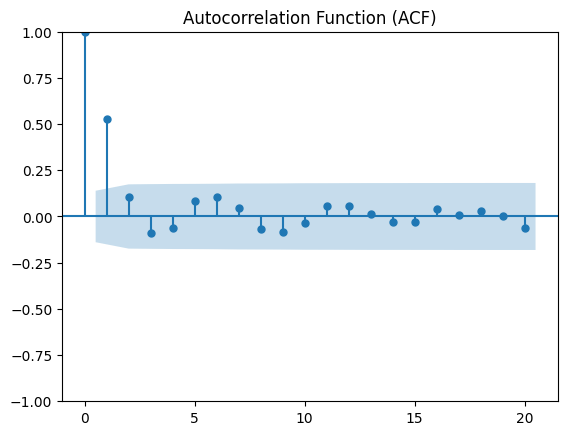

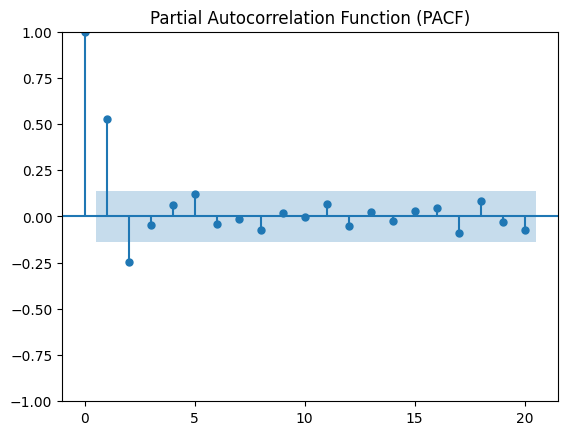

In [13]:
# ACF and PACF plots
plot_acf(data, lags=20, title="Autocorrelation Function (ACF)")
plt.show()

plot_pacf(data, lags=20, title="Partial Autocorrelation Function (PACF)")
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
result = adfuller(data)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: -8.764042028739462
p-value: 2.626843040091896e-14
The series is stationary.


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  198
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -266.607
Date:                Sat, 18 Jan 2025   AIC                            541.213
Time:                        12:54:00   BIC                            554.366
Sample:                             0   HQIC                           546.537
                                - 198                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0848      0.125     -0.680      0.496      -0.329       0.159
ma.L1          0.6410      0.081      7.911      0.000       0.482       0.800
ma.L2          0.2263      0.082      2.768      0.0

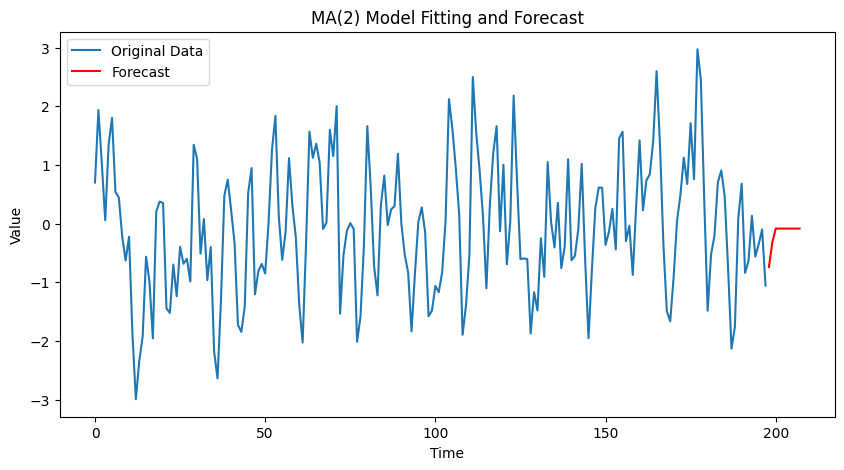

In [7]:
# Fit an MA(2) model
model = ARIMA(data, order=(0, 0, 2))  # (p=0, d=0, q=2)
model_fit = model.fit()

# Print summary of the fitted model
print(model_fit.summary())

# Forecast the next 10 values
forecast = model_fit.forecast(steps=10)

# Plot original data and forecast
plt.figure(figsize=(10, 5))
plt.plot(data, label="Original Data")
plt.plot(np.arange(len(data), len(data) + len(forecast)), forecast, label="Forecast", color="red")
plt.title("MA(2) Model Fitting and Forecast")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()


### ARIMA Model

c:\Users\vella\Desktop\Courses\AI\Code\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\vella\Desktop\Courses\AI\Code\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -130.434
Date:                Sat, 18 Jan 2025   AIC                            270.868
Time:                        13:12:17   BIC                            283.844
Sample:                             0   HQIC                           276.118
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1315      0.279      0.471      0.638      -0.416       0.679
ar.L2          0.8671      0.228      3.811      0.000       0.421       1.313
ma.L1         -0.0600      0.378     -0.159      0.8

c:\Users\vella\Desktop\Courses\AI\Code\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


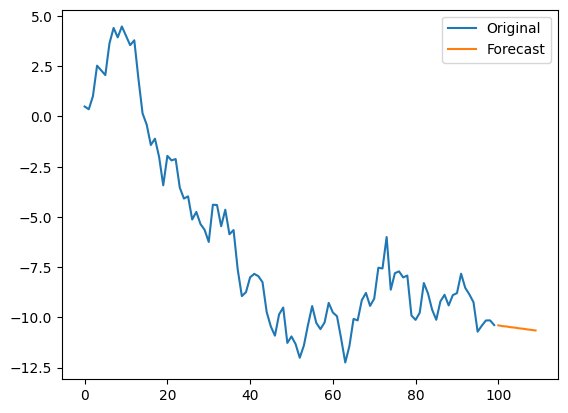

In [15]:
# Generate synthetic data
np.random.seed(42)
data = np.cumsum(np.random.randn(100))

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data, order=(2, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=10)
plt.plot(np.arange(len(data)), data, label='Original')
plt.plot(np.arange(len(data), len(data)+10), forecast, label='Forecast')
plt.legend()
plt.show()

### LSTM - Deep Learning

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data
sequence = np.array(data).reshape(-1, 1)
train, test = sequence[:80], sequence[80:]

# Create LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(10, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(train, train, epochs=50, batch_size=32, verbose=0)

c:\Users\vella\Desktop\Courses\AI\Code\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


array([[-8.905648 ],
       [-8.496607 ],
       [-6.8458266],
       [-7.4160814],
       [-8.32455  ],
       [-8.89819  ],
       [-7.8571057],
       [-7.489534 ],
       [-8.083602 ],
       [-7.5078845],
       [-7.400004 ],
       [-6.3436956],
       [-7.1055217],
       [-7.4678307],
       [-7.906398 ],
       [-9.583058 ],
       [-9.239444 ],
       [-8.938197 ],
       [-8.932313 ],
       [-9.202915 ]], dtype=float32)

# Unsupervised Learning

### K-Means

In [5]:
import numpy as np

def k_means(data, k, max_iter=100):
    # Step 1: Initialize centroids
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iter):
        # Step 2: Assign clusters
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)

        # Step 3: Update centroids
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

# Example data
from sklearn.datasets import make_blobs
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

clusters, centroids = k_means(data, k=4)

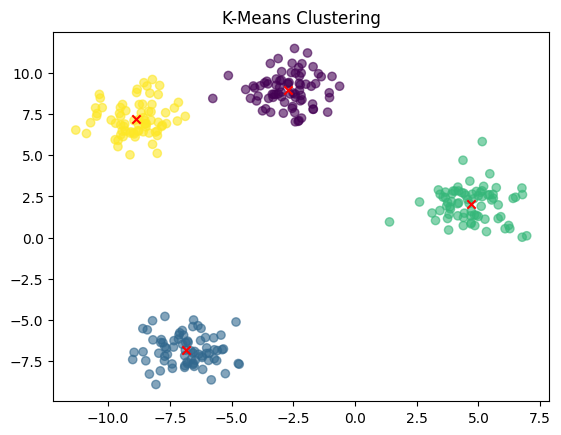

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# K-Means with Scikit-learn
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data)

# Visualization
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x')
plt.title("K-Means Clustering")
plt.show()

Custom Implementation with K-Means++

In [7]:
import numpy as np

def initialize_centroids(data, k):
    centroids = [data[np.random.choice(data.shape[0])]]

    for _ in range(1, k):
        distances = np.min(
            [np.linalg.norm(data - c, axis=1) for c in centroids], axis=0
        )
        probs = distances / distances.sum()
        centroids.append(data[np.random.choice(data.shape[0], p=probs)])

    return np.array(centroids)

def k_means_pp(data, k, max_iter=100):
    centroids = initialize_centroids(data, k)

    for _ in range(max_iter):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

#### Choosing the Optimal Number of Clusters:

Elbow Method:

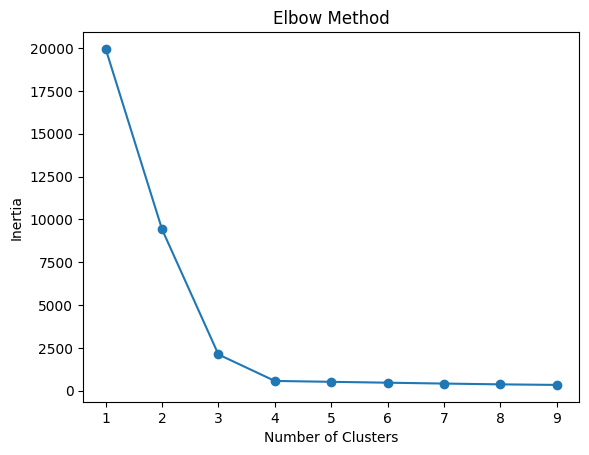

In [8]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Silhouette Analysis:

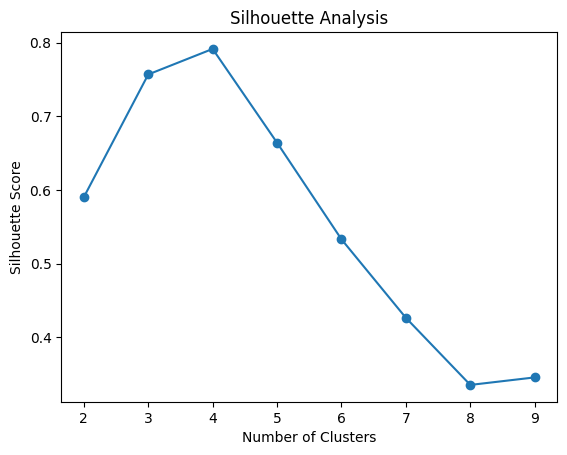

: 

In [9]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    scores.append(silhouette_score(data, kmeans.labels_))

plt.plot(range(2, 10), scores, marker='o')
plt.title("Silhouette Analysis")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

### Hierarchical Clustering

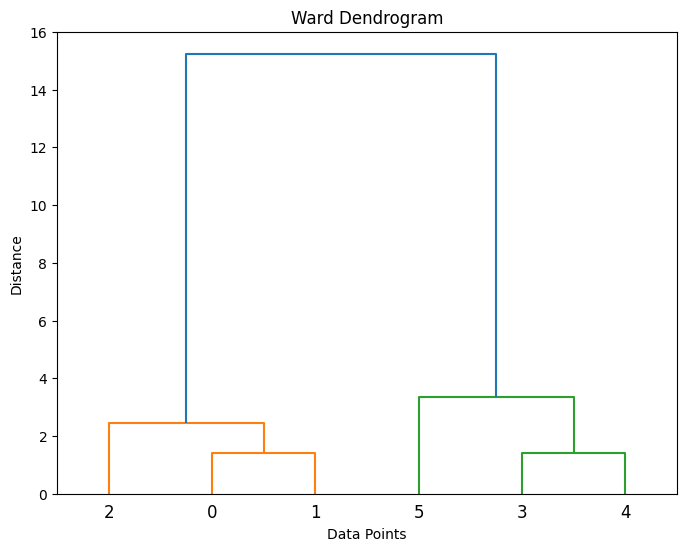

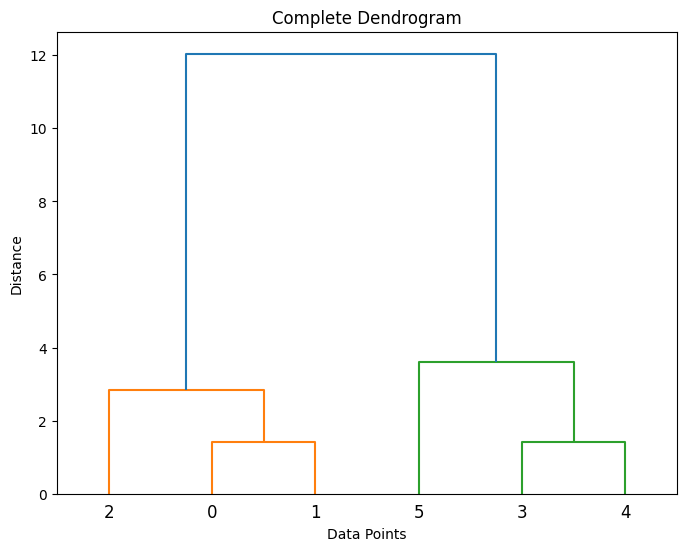

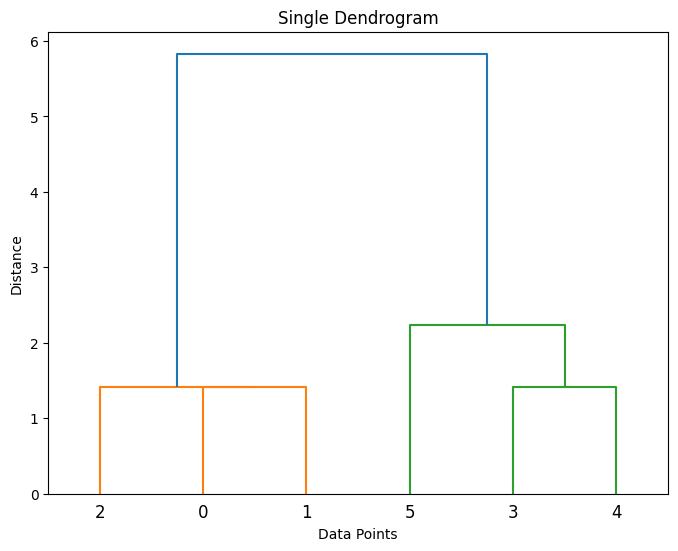

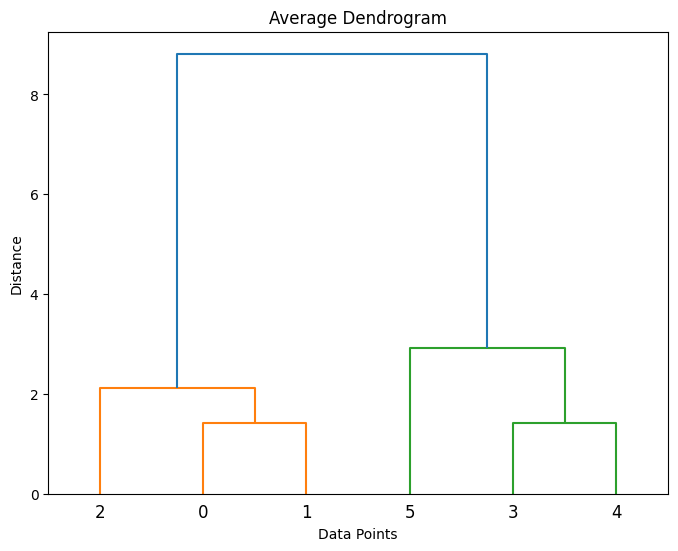

In [7]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.array([[1, 2], [2, 3], [3, 4], [8, 7], [9, 8], [10, 10]])

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title('Ward Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

linkage_matrix = linkage(X, method='complete')
# Plot dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title('Complete Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

linkage_matrix = linkage(X, method='single')
# Plot dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title('Single Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


linkage_matrix = linkage(X, method='average')
# Plot dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title('Average Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

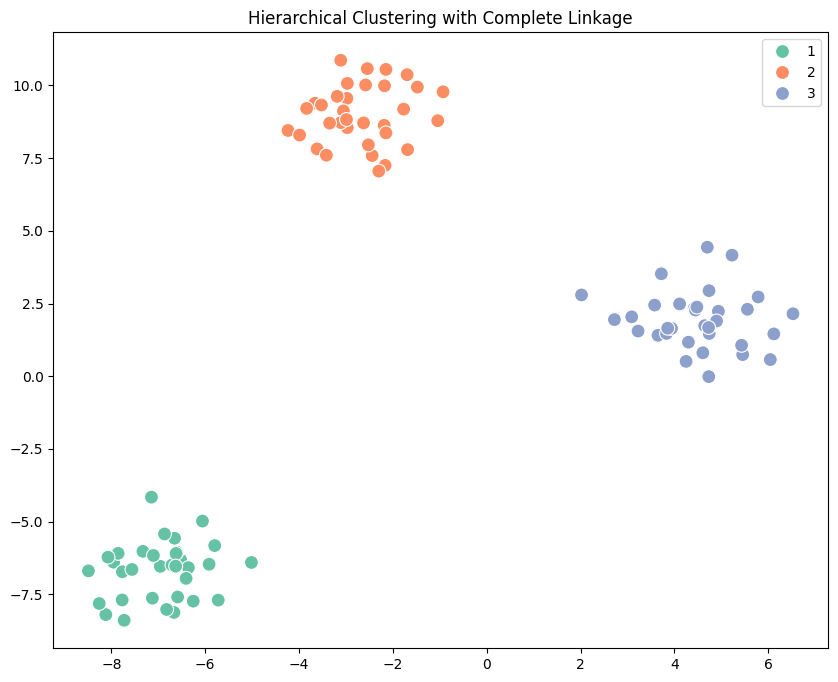

In [2]:
import seaborn as sns
from scipy.cluster.hierarchy import fcluster

# Generate complex dataset
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

# Hierarchical clustering with complete linkage
linkage_matrix = linkage(X, method='complete')

# Extract clusters
labels = fcluster(linkage_matrix, t=5, criterion='distance')

# Plot results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set2', s=100)
plt.title('Hierarchical Clustering with Complete Linkage')
plt.show()

### Dimensionality Reduction

#### PCA

Explained Variance Ratio: [0.28857914 0.23635118]


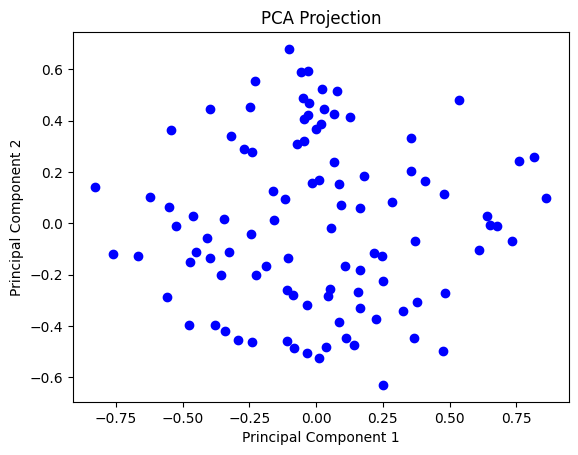

In [8]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
data = np.random.rand(100, 5)  # 100 samples, 5 features

# Apply PCA
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Visualization
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.show()

#### LDA

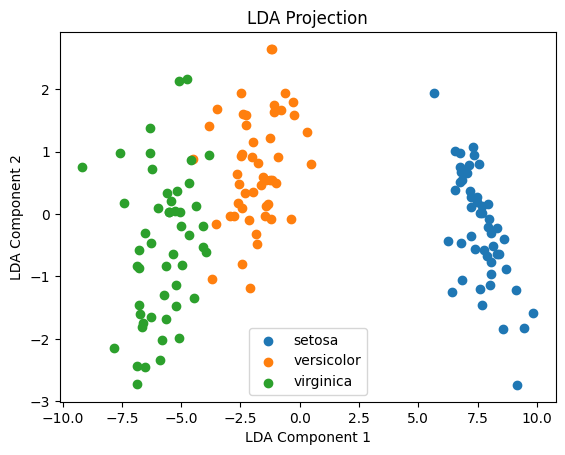

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Visualization
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=target_name)
plt.legend()
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection')
plt.show()

#### Combining PCA and LDA

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PCA + LDA Pipeline
pipeline = Pipeline([
    ('pca', PCA(n_components=5)),
    ('lda', LinearDiscriminantAnalysis(n_components=2))
])

# Transform data
X_train_transformed = pipeline.fit_transform(X_train, y_train)
X_test_transformed = pipeline.transform(X_test)

# Classification
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_transformed, y_train)
accuracy = clf.score(X_test_transformed, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9814814814814815
